In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import requests
from  time import localtime as lt

C:\Users\leona\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
fecha_fin=[str(d) for d in list(lt())[:2]]+["01"]
fecha_fin="-".join(fecha_fin)+"/"
url='https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF282,SF43939,SF3270,SF43945/datos/2019-01-01/'+fecha_fin+'?token='+token
r=requests.get(url)
data=r.json()
cetes_28,cetes_90,cetes_180,cetes_360=data['bmx']['series']
cetes=[cetes_28,cetes_90,cetes_180,cetes_360]
def pd_cetes(data):
    df_cetes=pd.DataFrame(data['datos'])
    df_cetes=df_cetes[df_cetes['dato']!='N/E']
    df_cetes.columns=['fecha','tasa']
    df_cetes=df_cetes['tasa'].astype(float)/100
    return df_cetes
cetes_28,cetes_90,cetes_180,cetes_360=list(map(pd_cetes,cetes))

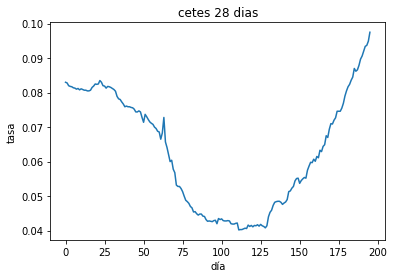

In [12]:
cetes_28.plot(title="cetes 28 dias",xlabel="día",ylabel="tasa");

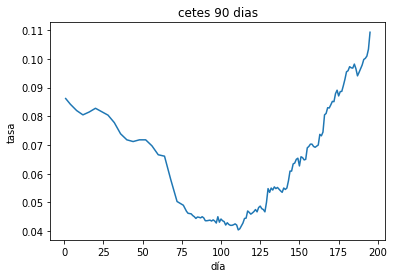

In [4]:
cetes_90.plot(title="cetes 90 dias",xlabel="día",ylabel="tasa");


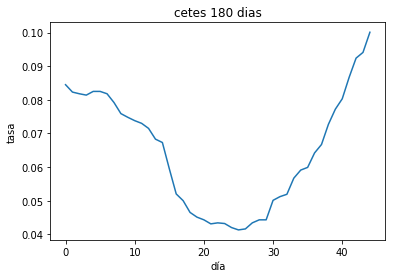

In [5]:
cetes_180.plot(title="cetes 180 dias",xlabel="día",ylabel="tasa");

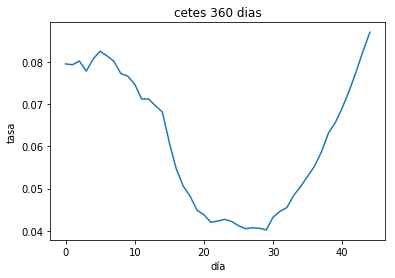

In [6]:
cetes_360.plot(title="cetes 360 dias",xlabel="día",ylabel="tasa");

$$ r_{t}=\beta_{0} + \beta_{1}r_{t-1} + \sigma \epsilon_{t} $$


Donde:

$e_{t} - N(0,\sigma^{2})$



$\beta_{0}=ab$

$\beta_{1}=1-a$

$E[r_{t}]=\frac{\beta_{0}}{(1-\beta_{1})}=b$

$Var[r_{t}]=\frac{\sigma^2}{(1-\beta_{1})^2}=\frac{\sigma^2}{[1-(1-a)^2]}$



In [7]:
def n_tasas(hist,n):
    def tasa_vasicek(data):
        var=np.var(data)
        b=np.mean(data)
        delta=np.diff(data)
        lag=data[:-1]
        model=sm.OLS(delta,lag).fit()
        a=-float(model.params)
        norm = np.random.normal(0, var)
        b_0=a*b
        b_1=1-a
        return b_0+b_1*data[-1]+var**(1/2)*norm
    datos=list(hist)
    for i in range(n):
        datos+=[tasa_vasicek(datos)]
    return datos[-n:]

In [8]:
display(cetes_28.tail(),n_tasas(cetes_28,3))

191    0.0920
192    0.0934
193    0.0937
194    0.0949
195    0.0975
Name: tasa, dtype: float64

[0.0975539112524732, 0.09759905316310781, 0.09764719545628606]

In [9]:
display(cetes_90.tail(),n_tasas(cetes_90,3))

191    0.0998
192    0.1002
193    0.1010
194    0.1034
195    0.1093
Name: tasa, dtype: float64

[0.10945498097243125, 0.10960857509262471, 0.1097646403596048]

In [10]:
display(cetes_180.tail(),n_tasas(cetes_180,3))

40    0.0803
41    0.0867
42    0.0924
43    0.0941
44    0.1001
Name: tasa, dtype: float64

[0.10031713040531551, 0.10053513528773483, 0.1007329033693382]

In [11]:
display(cetes_360.tail(),n_tasas(cetes_360,3))

40    0.0691
41    0.0731
42    0.0776
43    0.0825
44    0.0870
Name: tasa, dtype: float64

[0.08706566131429322, 0.08712797879613171, 0.08718945411348004]